### Problem 1
Implement Runge-Kutta 4th order method and solve the following initial value problem:
$$y' = 5y-5ty^3, y(0) = 1$$
Compare to the exact solution:
$$y = \left(1.1e^{10t}+t-\frac{1}{10}\right)^{-1/2}$$
Find $y(1)$.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
#matplotlib inline

In [42]:
def f(t, y):
    return 2*t*y
    #return 5*y-5*t*y**3

In [43]:
def y_true(t):
    return np.exp(t**2)
    #return np.power(1.1*np.exp(10*t)+t-1/10, -0.5)

$$y_{i+1} = y_i + \frac{h}{6}(k_1+2k_2+2k_3+k_4)$$
$$k_1 = f(t_i, y_i)$$
$$k_2 = f(t_i+h/2, y_i+h*k_1/2)$$
$$k_3 = f(t_i+h/2, y_i+h*k_2/2)$$
$$k_4 = f(t_i+h, y_i+h*k_3)$$

In [35]:
def rk4(t0, y0, t1, h):
    y = [y0]
    t = [t0]
    t_i = t0
    y_i = y0
    while(t_i<t1):
        k1 = f(t_i, y_i)
        k2 = f(t_i+h/2, y_i+h*k1/2)
        k3 = f(t_i+h/2, y_i+h*k2/2)
        k4 = f(t_i+h, y_i+h*k3)
        y_i += h*(k1+2*k2+2*k3+k4)/6
        t_i += h
        t.append(t_i)
        y.append(y_i)
    return np.array(t), np.array(y)

In [46]:
t, y = rk4(0.0, 1, 1, 0.1)

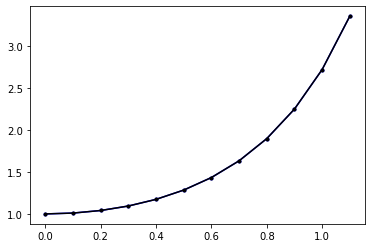

In [47]:
plt.plot(t, y, 'b.-', t, y_true(t), 'k.-')
plt.show()

### Problem 2
Use implemented Runge-Kutta method to solve the Lotka-Volterra system:
$$x' = \alpha x - \beta xy$$
$$y' = \delta xy - \gamma y,$$
where $\alpha=0.4, \beta=0.4, \gamma=2, \delta=0.09$. Initial conditions are $x(0)=100, y(0)=8$. Find the dynamics over 50 units of time.

In [48]:
import matplotlib.pyplot as plt
import numpy as np
#matplotlib inline

In [73]:
a, b, c, d = 0.4, 0.4, 2, 0.09
def f_lv(x, y):
    return a*x-b*x*y, d*x*y-c*y

In [74]:
def rk4(t0, x0, y0, t1, h):
    x = [x0]
    y = [y0]
    t = [t0]
    t_i = t0
    y_i = y0
    x_i = x0
    while(t_i<t1):
        kx1, ky1 = f_lv(x_i, y_i)
        kx2, ky2 = f_lv(x_i+h*kx1/2, y_i+h*ky1/2)
        kx3, ky3 = f_lv(x_i+h*kx2/2, y_i+h*ky2/2)
        kx4, ky4 = f_lv(x_i+h*kx3, y_i+h*ky3)
        x_i += h*(kx1+2*kx2+2*kx3+kx4)/6
        y_i += h*(ky1+2*ky2+2*ky3+ky4)/6
        t_i += h
        t.append(t_i)
        x.append(x_i)
        y.append(y_i)
    return np.array(t), np.array(x), np.array(y)

In [85]:
t, x, y = rk4(0, 50, 2, 50, 1)

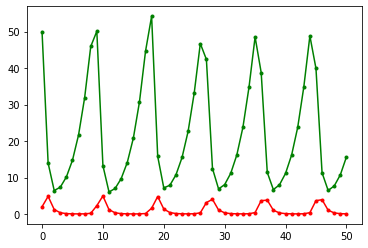

In [86]:
plt.plot(t, x, 'g.-', t, y, 'r.-')
plt.show()

### Problem 3
Implement shooting method to solve the following Boundary Value Problem:
$$\frac{d^2y}{dt^2} = \frac{3}{2}y^2, ~~ y(0)=4, y(1)=1$$

In [87]:
import matplotlib.pyplot as plt
import numpy as np
#matplotlib inline

In [88]:
def f(w, y):
    return 3*y**2/2, w

In [89]:
def rk4(t0, y0, w0, t1, h):
    y = [y0]
    w = [w0]
    t = [t0]
    t_i = t0
    y_i = y0
    w_i = w0
    while(t_i<=t1):
        kw1, ky1 = f_lv(w_i, y_i)
        kw2, ky2 = f_lv(w_i+h*kw1/2, y_i+h*ky1/2)
        kw3, ky3 = f_lv(w_i+h*kw2/2, y_i+h*ky2/2)
        kw4, ky4 = f_lv(w_i+h*kw3, y_i+h*ky3)
        w_i += h*(kw1+2*kw2+2*kw3+kw4)/6
        y_i += h*(ky1+2*ky2+2*ky3+ky4)/6
        t_i += h
        t.append(t_i)
        y.append(y_i)
    return np.array(t), np.array(y)

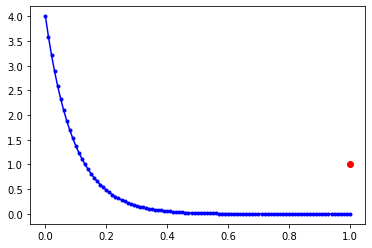

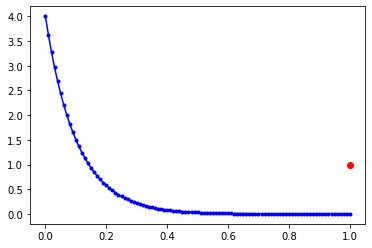

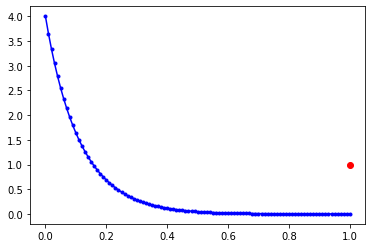

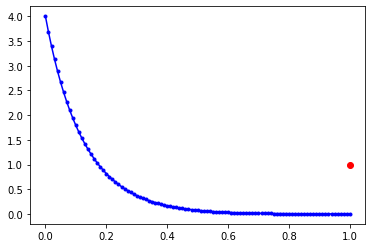

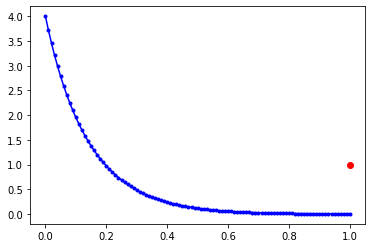

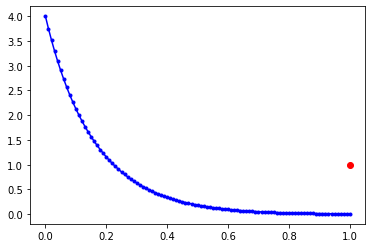

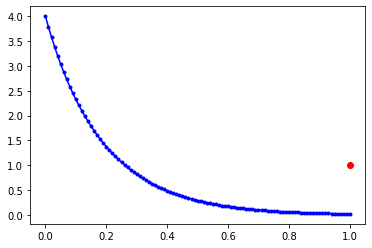

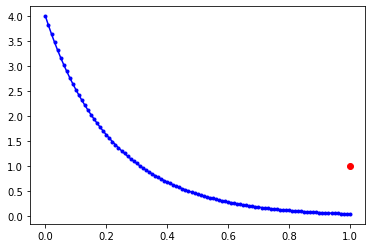

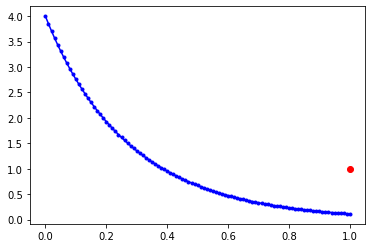

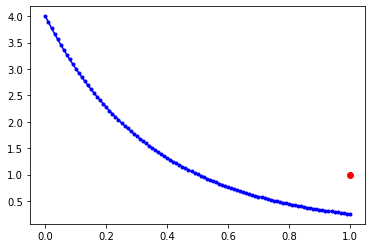

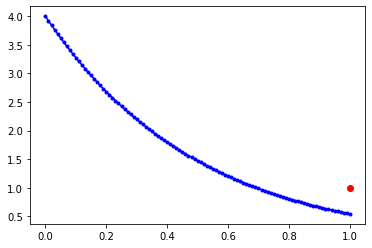

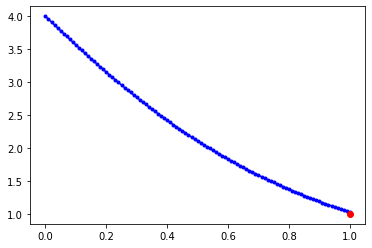

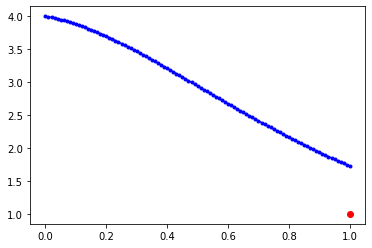

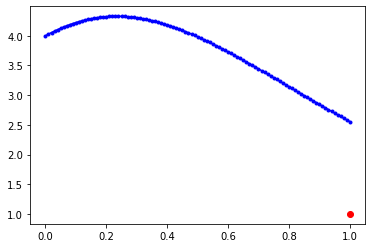

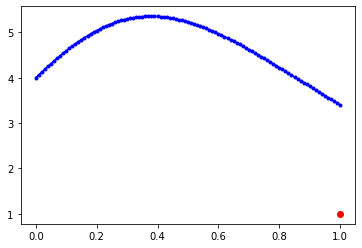

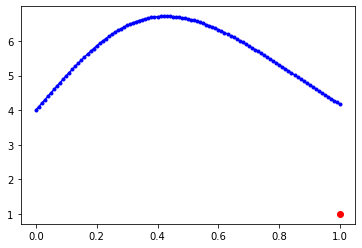

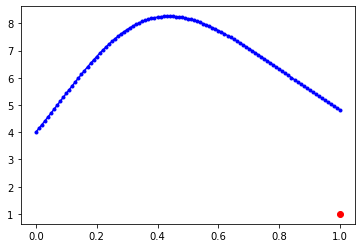

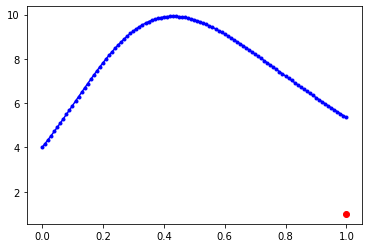

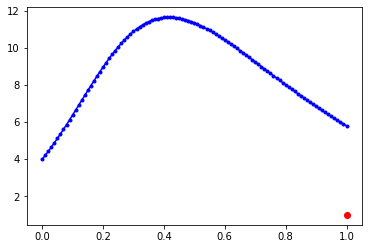

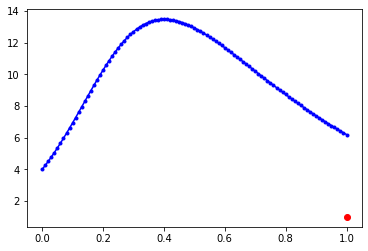

In [93]:
for w0 in range(-100, 100, 10):
    t, y = rk4(0, 4, w0, 1, 0.01)
    plt.plot(t, y, 'b.-')
    plt.plot([1], [1], 'ro')
    plt.show()

### Problem 4
Solve the same problem using matrix solution.